In [55]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv('abalone.csv')
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


We have only one feature with object data, remaining has numeric values

In [5]:
data.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

There are no null values in the dataset

<AxesSubplot:>

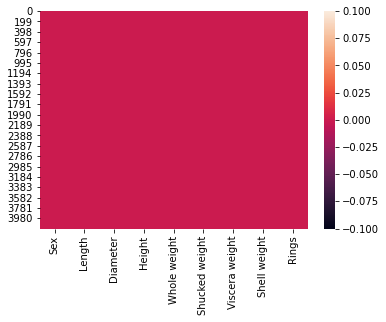

In [6]:
sns.heatmap(data.isnull())

In [7]:
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


Will change the column name of 'Rings' to 'Age' by adding 1.5 to each row.

In [8]:
data['Age']=data['Rings']+1.5

In [9]:
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5


Dropping the Rings column

In [10]:
data.drop(['Rings'],axis=1,inplace=True)
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


Checking the object attribute

In [11]:
data['Sex'].value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='count'>

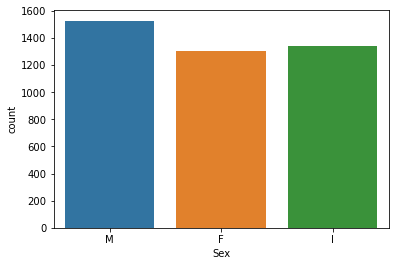

In [12]:
sns.countplot(x='Sex',data=data)

High number of males attributes are present in the dataset

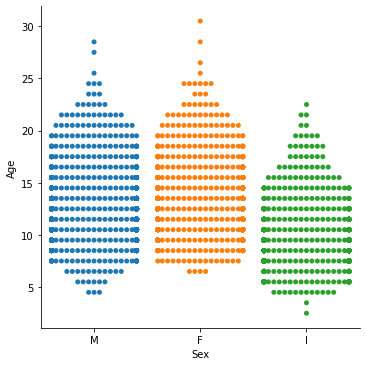

In [13]:
sns.catplot(data=data,x='Sex',y='Age',kind='swarm')

The ranges have been plotted

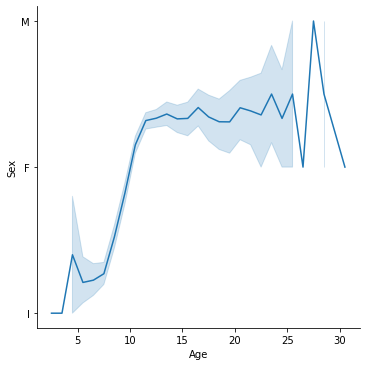

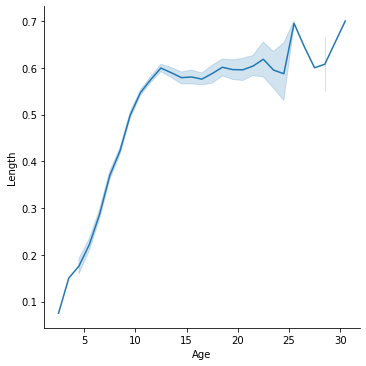

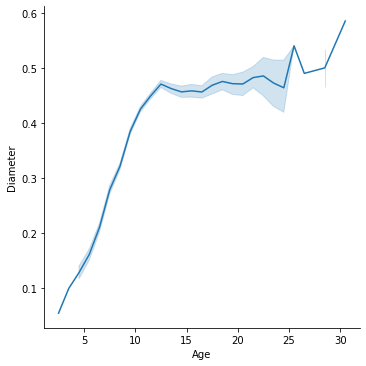

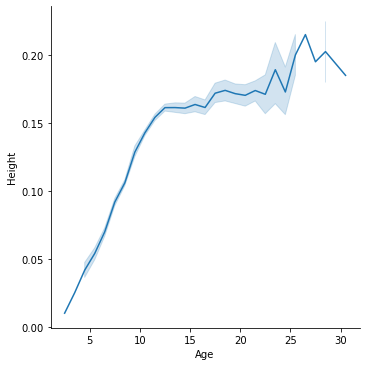

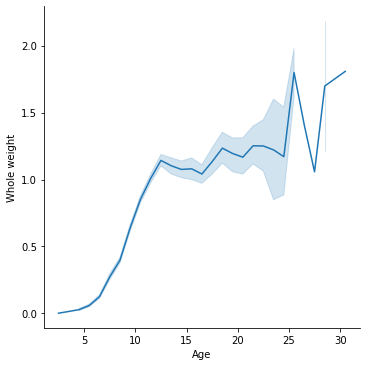

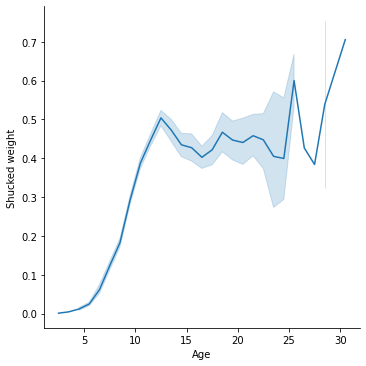

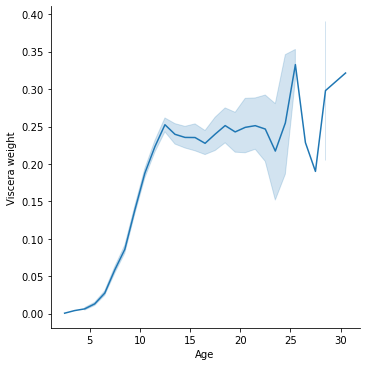

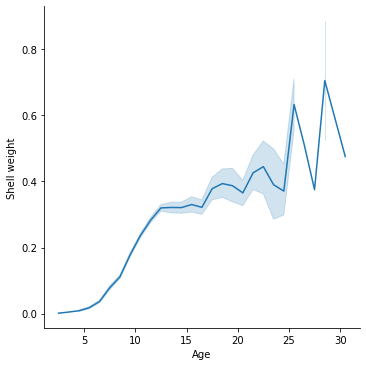

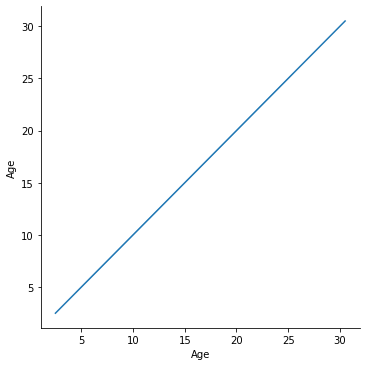

In [14]:
for i in data.columns:
    sns.relplot(x='Age',y=i,data=data,kind='line')
    plt.show()

The parameters have a positive relation with respect to Age

In [53]:
col=['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight','Viscera weight', 'Shell weight', 'Age']#except the parameter 'Sex'since it is to be converter

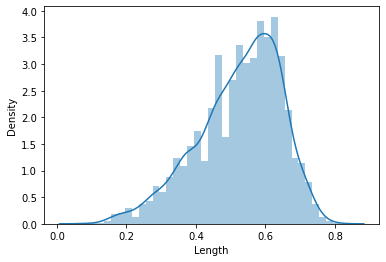

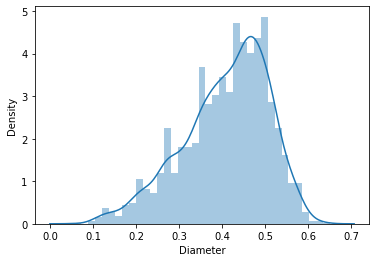

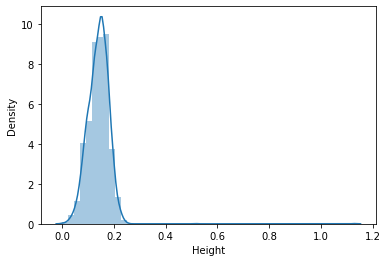

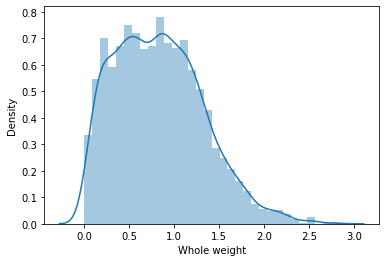

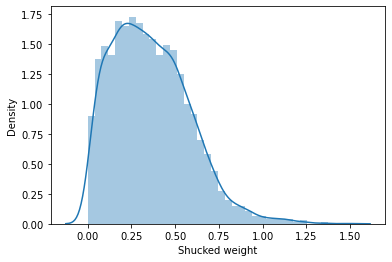

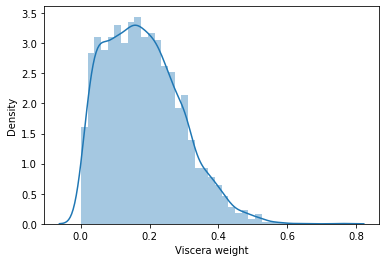

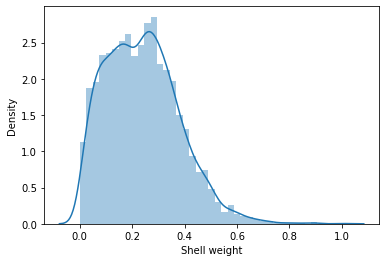

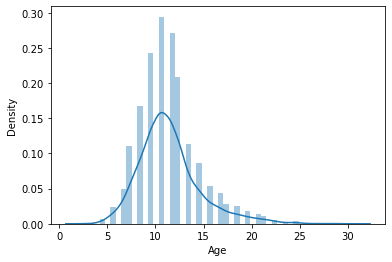

In [16]:
for i in col:
    plt.subplots()
    sns.distplot(data[i])

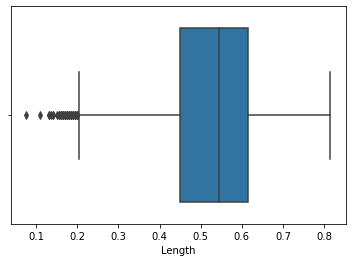

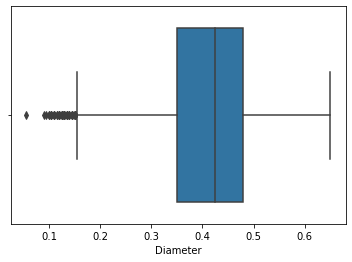

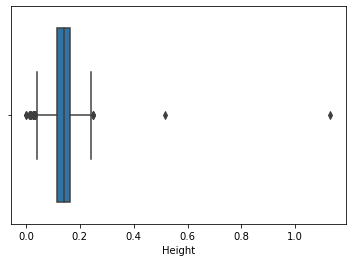

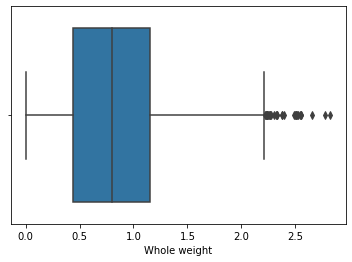

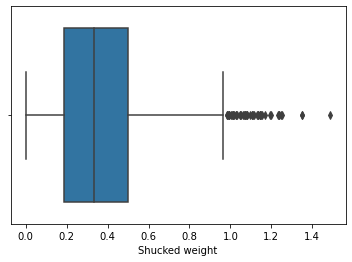

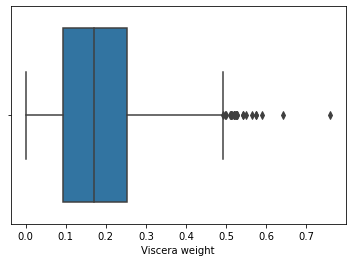

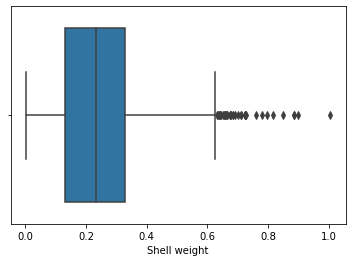

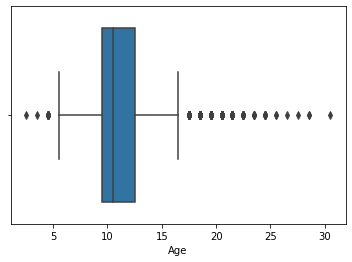

In [17]:
for i in col:
    sns.boxplot(data[i])
    plt.show()

We could see that the outliers are present in the model

Checking the corelation using heatmap

<AxesSubplot:>

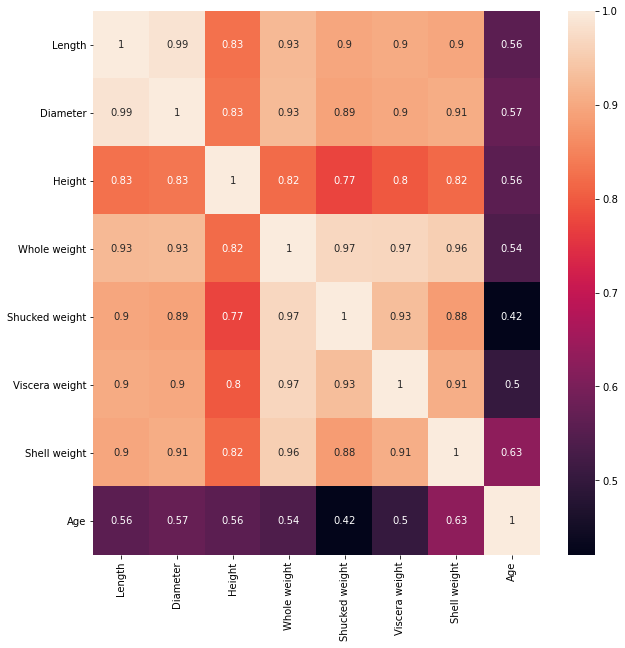

In [18]:
plt.figure(figsize=(10,10))
cor=data.corr()
sns.heatmap(cor,annot=True)

As observed
Age has the highest co relation with Shell weight and least with Shucked weight.
Whole weight is highly corelated with all the features
Shell weight, Viscera weight, Shucked weight and whole weight are highly co related with each other.
We will see how our model will perform. We can also check our model performance with PCA

Pre-Dataprocessing
Using ordinal encoder to convert object into integer

In [19]:
Ordinal=OrdinalEncoder()

In [20]:
data[['Sex']]=Ordinal.fit_transform(data[['Sex']])
data['Sex'].value_counts()

2.0    1528
1.0    1342
0.0    1307
Name: Sex, dtype: int64

In [21]:
data['Age'].value_counts()

10.5    689
11.5    634
9.5     568
12.5    487
8.5     391
13.5    267
7.5     259
14.5    203
15.5    126
6.5     115
16.5    103
17.5     67
18.5     58
5.5      57
19.5     42
20.5     32
21.5     26
4.5      15
22.5     14
24.5      9
23.5      6
28.5      2
25.5      2
3.5       1
26.5      1
27.5      1
30.5      1
2.5       1
Name: Age, dtype: int64

Using Z transform

In [22]:
z=np.abs(zscore(data))
z

array([[1.15198011, 0.57455813, 0.43214879, ..., 0.72621157, 0.63821689,
        1.57154357],
       [1.15198011, 1.44898585, 1.439929  , ..., 1.20522124, 1.21298732,
        0.91001299],
       [1.28068972, 0.05003309, 0.12213032, ..., 0.35668983, 0.20713907,
        0.28962385],
       ...,
       [1.15198011, 0.6329849 , 0.67640943, ..., 0.97541324, 0.49695471,
        0.28962385],
       [1.28068972, 0.84118198, 0.77718745, ..., 0.73362741, 0.41073914,
        0.02057072],
       [1.15198011, 1.54905203, 1.48263359, ..., 1.78744868, 1.84048058,
        0.64095986]])

In [23]:
data_new=data[(z<3).all(axis=1)]

In [24]:
data.shape

(4177, 9)

In [25]:
data_new.shape

(4027, 9)

In [26]:
100-((4027/4177)*100)

3.5910940866650662

We have lost only 3% in the data after removal of outliers which is acceptable

Check for skewness now by splitting the X and Y from the data

In [27]:
x=data.drop(columns='Age')
y=data['Age']

In [28]:
x.skew()

Sex              -0.098155
Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
dtype: float64

In [29]:
x['Length']=np.square(x['Length'])
x['Diameter']=np.square(x['Diameter'])

In [30]:
x['Shucked weight']=np.sqrt(x['Shucked weight'])

In [31]:
x['Height']=np.sqrt(x['Height'])

In [32]:
x.skew()

Sex              -0.098155
Length           -0.068660
Diameter         -0.026554
Height           -0.295641
Whole weight      0.530959
Shucked weight   -0.141443
Viscera weight    0.591852
Shell weight      0.620927
dtype: float64

Checking with the hostogram plot

array([[<AxesSubplot:title={'center':'Sex'}>,
        <AxesSubplot:title={'center':'Length'}>,
        <AxesSubplot:title={'center':'Diameter'}>,
        <AxesSubplot:title={'center':'Height'}>],
       [<AxesSubplot:title={'center':'Whole weight'}>,
        <AxesSubplot:title={'center':'Shucked weight'}>,
        <AxesSubplot:title={'center':'Viscera weight'}>,
        <AxesSubplot:title={'center':'Shell weight'}>]], dtype=object)

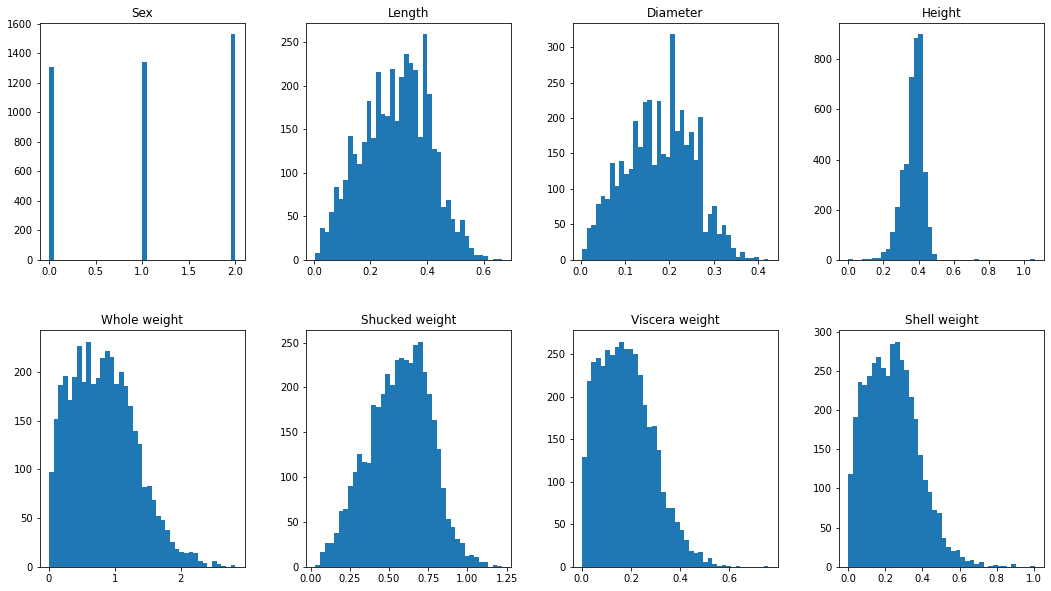

In [33]:
x.hist(figsize=(18,10), grid=False, layout=(2, 4), bins = 40)

Standardizing using the Standard Scalar method

In [34]:
sc=StandardScaler()
sc_x=sc.fit_transform(x)

In [35]:
sc_x

array([[ 1.15198011, -0.69410371, -0.56588297, ..., -0.4737027 ,
        -0.72621157, -0.63821689],
       [ 1.15198011, -1.40991617, -1.39519277, ..., -1.2824301 ,
        -1.20522124, -1.21298732],
       [-1.28068972, -0.06848236,  0.00245751, ..., -0.30701248,
        -0.35668983, -0.20713907],
       ...,
       [ 1.15198011,  0.60138768,  0.65043806, ...,  0.80848861,
         0.97541324,  0.49695471],
       [-1.28068972,  0.86074002,  0.77680907, ...,  0.82780925,
         0.73362741,  0.41073914],
       [ 1.15198011,  1.82171983,  1.73512261, ...,  2.07206731,
         1.78744868,  1.84048058]])

In [36]:
x=sc_x

Peoceeding with the Model preparation

In [37]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f'At random state {i},the training accuracy is: {r2_score(y_train,pred_train)}')
    print(f'At random state {i},the testing accuracy is: {r2_score(y_test,pred_test)}')
    print('\n')

At random state 0,the training accuracy is: 0.4724879054289598
At random state 0,the testing accuracy is: 0.5103873141073609


At random state 1,the training accuracy is: 0.48722862572818304
At random state 1,the testing accuracy is: 0.45412371191521295


At random state 2,the training accuracy is: 0.4783193125753957
At random state 2,the testing accuracy is: 0.4830212920946242


At random state 3,the training accuracy is: 0.4877300463581071
At random state 3,the testing accuracy is: 0.4498050179305141


At random state 4,the training accuracy is: 0.4851676809394837
At random state 4,the testing accuracy is: 0.4589064067394282


At random state 5,the training accuracy is: 0.4940717966353082
At random state 5,the testing accuracy is: 0.42755228593042094


At random state 6,the training accuracy is: 0.4694416577007686
At random state 6,the testing accuracy is: 0.5262267440771848


At random state 7,the training accuracy is: 0.47451020301357594
At random state 7,the testing accuracy is: 0

We could see that , random state=12 is perfect for the model preparation

In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=12)

In [39]:
lr.fit(x_train,y_train)
pred_train=lr.predict(x_train)
pred_test=lr.predict(x_test)
train_score=r2_score(y_train,pred_train)
test_score=r2_score(y_test,pred_test)
print('The training accuracy of LinearRegression is', train_score)
print('The test accuracy of LinearRegression is', test_score)

The training accuracy of LinearRegression is 0.47190927662143
The test accuracy of LinearRegression is 0.5136754905654553


Fitting the data to SupportVectorRegression mode

In [40]:
kernellist=['linear','poly','rbf']
for i in kernellist:
    sv=SVR(kernel=i)
    sv.fit(x_train,y_train)
    print(sv.score(x_train,y_train))

0.443991549111597
0.33954378329576607
0.5374386952487518


In [41]:
sv=SVR(kernel='rbf')
sv.fit(x_train,y_train)
pred_train=sv.predict(x_train)
pred_test=sv.predict(x_test)
train_score=r2_score(y_train,pred_train)
test_score=r2_score(y_test,pred_test)
print('The training accuracy of SVR is', train_score)
print('The test accuracy of SVR is', test_score)

The training accuracy of SVR is 0.5374386952487518
The test accuracy of SVR is 0.5861674037603256


The accuracy has improved vastly from Linear regression.

In [42]:
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
pred_train=dt.predict(x_train)
pred_test=dt.predict(x_test)
train_score=r2_score(y_train,pred_train)
test_score=r2_score(y_test,pred_test)
print('The training accuracy of DT is', train_score)
print('The test accuracy of DT is', test_score)

The training accuracy of DT is 1.0
The test accuracy of DT is 0.23432338797944174


In [43]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
pred_train=rf.predict(x_train)
pred_test=rf.predict(x_test)
train_score=r2_score(y_train,pred_train)
test_score=r2_score(y_test,pred_test)
print('The training accuracy of RF is', train_score)
print('The test accuracy of RF is', test_score)

The training accuracy of RF is 0.934072225312714
The test accuracy of RF is 0.599460538733525


Checking the accuracy using by Cross validation from the results of the other Models

In [44]:
model=(lr,rf,dt,sv)
for m in model:
    score=cross_val_score(m,x,y,cv=5)
    print('Mean Accuracy of', m)
    print(score.mean())
    print('\n')

Mean Accuracy of LinearRegression()
0.35661035161568755


Mean Accuracy of RandomForestRegressor()
0.43860765891232223


Mean Accuracy of DecisionTreeRegressor()
-0.1652771811512214


Mean Accuracy of SVR()
0.49228274143613804




Hypertuning the modal

In [45]:
parameters={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

GridSearchCV(estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10],
                         'random_state': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]})

In [46]:
clf.best_params_

{'alpha': 0.01, 'random_state': 0}

In [47]:
ls=Lasso(alpha=0.01,random_state=0)
ls.fit(x_train,y_train)
ls.score=(x_train,y_train)

In [48]:
parameters=[{'kernel': ['rbf'], 'gamma': [0.01, 0.1, 0.2, 0.5, 0.6, 0.9],'C': [1, 10, 100]}]
clf1=GridSearchCV(SVR(),parameters)

In [49]:
clf1.fit(x_train,y_train)

GridSearchCV(estimator=SVR(),
             param_grid=[{'C': [1, 10, 100],
                          'gamma': [0.01, 0.1, 0.2, 0.5, 0.6, 0.9],
                          'kernel': ['rbf']}])

In [50]:
clf1.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

Fitting  the modal with the above parameters

In [51]:
Finalmod=SVR(C=10, gamma=0.1, kernel='rbf')
Finalmod.fit(x_train,y_train)
pred=Finalmod.predict(x_test)
acc=r2_score(y_test,pred)
cvscore=cross_val_score(Finalmod,x,y,cv=5)
print('Model Accuracy',acc*100)
print('Cross validation Accuracy',cvscore.mean()*100)

Model Accuracy 61.384473336209886
Cross validation Accuracy 51.64723716536046


From SVR we are getting the Accuracy 54% and Cross_val score of 51%

In [52]:
import joblib
joblib.dump(Finalmod,'Abalone_study.obj')

['Abalone_study.obj']